<center> <span style="color:indigo">Machine Learning e Inferencia Bayesiana</span> </center> 

<div style="text-align: center;">
<img src="../Imagenes/CUGDL_logo.png" alt="Drawing" style="width: 800px;"/>
</div>

<center> <span style="color:DarkBlue">  Tema 2. Estadística Descriptiva: Representaciones gráficas </span>  </center>
<center> <span style="color:Blue"> Profesor: M. en C. Iván A. Toledano Juárez </span>  </center>

In [1]:
# Librería para manipulación y análisis de datos en formato tabular (estructuras tipo DataFrame).
import pandas as pd

# Librería para operaciones numéricas, arreglos multidimensionales y álgebra lineal.
import numpy as np

# Módulo para generar gráficos básicos (líneas, barras, histogramas, etc.).
import matplotlib.pyplot as plt

# Librería para visualizaciones estadísticas avanzadas con estilos más atractivos.
import seaborn as sns

# Permite insertar y mostrar imágenes dentro del notebook.
from IPython.display import Image

# Módulo para interactuar con el sistema operativo (por ejemplo, rutas de archivos).
import os

# Comando mágico de Jupyter para mostrar las gráficas directamente en el notebook.
%matplotlib inline


## Paquetería de `pandas`

La librería **`pandas`** es una herramienta fundamental en Python para el análisis y manipulación de datos. Permite trabajar con estructuras de datos como:

- **`Series`**: vectores unidimensionales con etiquetas.
- **`DataFrames`**: estructuras tabulares similares a las hojas de cálculo o tablas de bases de datos.

Una de las principales ventajas de `pandas` es su capacidad para **importar datos desde múltiples fuentes y formatos**, y convertirlos fácilmente en `DataFrames` para su análisis. Las funciones más comunes para importar datos son:

| Tipo de archivo         | Función de `pandas`                  |
|-------------------------|--------------------------------------|
| CSV (valores separados por comas) | `pd.read_csv('archivo.csv')`            |
| Excel                   | `pd.read_excel('archivo.xlsx')`      |
| Archivos delimitados    | `pd.read_table('archivo.txt')`       |
| JSON                    | `pd.read_json('archivo.json')`       |
| SQL (bases de datos)    | `pd.read_sql(query, conexion)`       |
| HTML (tablas en web)    | `pd.read_html('pagina.html')`        |
| Parquet (columnar, binario) | `pd.read_parquet('archivo.parquet')` |

> Todas estas funciones devuelven un objeto `DataFrame`.

In [2]:
#filepath = '../data/pokemon/pokemon.csv' # path del archivo csv
url = "https://raw.githubusercontent.com/IvTole/MachineLearning_InferenciaBayesiana_CUGDL/refs/heads/main/data/pokemon/pokemon.csv"
df_pokemon = pd.read_csv(url) # importación del archivo

In [3]:
type(df_pokemon)

pandas.core.frame.DataFrame

In [4]:
df_pokemon.head() # imprimimos en consola las primeras observaciones

,Name,Type
0,Bulbasaur,"Grass, Poison"
1,Ivysaur,"Grass, Poison"
2,Venusaur,"Grass, Poison"
3,Charmander,Fire
4,Charmeleon,Fire


In [5]:
df_pokemon.info() # Información básica de la estructura del dataframe cargado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1010 non-null   object
 1   Type    1010 non-null   object
dtypes: object(2)
memory usage: 15.9+ KB


## Gráficos en python con `matplotlib`

Cuando trabajamos con análisis de datos en Python, existen dos formas comunes de crear gráficos:

* Usar los **métodos integrados de `pandas`** (por ejemplo: `df.plot()`).
* Usar directamente la **API de `matplotlib.pyplot`** (por ejemplo: `plt.plot()`).

Aunque los métodos de `pandas` son prácticos para gráficos rápidos, `matplotlib` ofrece **mayor control, personalización y precisión**. Algunas ventajas incluyen:

* **Mayor personalización**. Ouedes modificar casi cualquier aspecto del gráfico.
* **Subgráficos y diseños más complejos**. Permite crear layouts personalizados, como múltiples subgráficos (`plt.subplot()` ó `plt.subplots()`), gráficos embebidos, anotaciones, etc.
* **Composición con otras visualizaciones**. Combinar elementos como flechas, texto, líneas de referencia, anotaciones estadísticas, etc.

Al usar `matplotlib` directamente, un estudiantes se familiariza con la estructura gráfica en python, lo que facilita el uso posterior de librerías más avanzadas y más vistozas como pueden ser `seaborn`o `plotly`, que a su vez también se apoyan en `matplotlib`.

En este notebook se crearán gráficos comunes para visualizar la información de variables tanto categóricas como numéricas. Para esto, comenzamos con el concepto de **tabla de frecuencia**.

#### Tabla de frecuencias

Una **tabla de frecuencias** es una herramienta fundamental en estadística descriptiva que permite organizar y resumir un conjunto de datos, mostrando **cuántas veces ocurre cada valor o grupo de valores**.

Se utiliza tanto para variables **categóricas** como **numéricas** (discretas o agrupadas en intervalos).

Una tabla de frecuencias puede incluir:

| Concepto                       | Descripción                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| **Frecuencia absoluta $f_i$**     | Número de veces que aparece un valor o clase.                              |
| **Frecuencia relativa $h_i$**     | Proporción del total que representa cada clase: \( h_i = \frac{f_i}{n} \).  |
| **Frecuencia acumulada $F_i$**    | Suma acumulada de las frecuencias absolutas.                               |
| **Frecuencia relativa acumulada $H_i$** | Suma acumulada de las frecuencias relativas.                                |

siendo $n$ es el número total de observaciones.

Por ejemplo, vamos a transformal el dataframe cargado con datos de Pokemon, para tener una tabla de frecuencias de los tipos que más aparecen en los datos, por ejemplo, los primeros 10.

In [6]:
df_types = df_pokemon.groupby('Type').count().sort_values(by='Name',ascending=False)
df_types_top10 = df_pokemon.groupby('Type').count().sort_values(by='Name',ascending=False).head(10)
df_types_top10

,Name
Type,
Water,74
Normal,74
Grass,46
Psychic,39
Fire,36
Electric,35
Fighting,28
"Normal, Flying",27
Bug,23


Aquí observamos que tenemos un nuevo dataframe agrupado por el número de frecuencia, en orden descendente, cuyo nombre de columna lo hizo como "Name", mientras que los "Type" actúan como índice de cada observación. Además, se hace el top 10.

Con esta **tabla de frecuencias**, podemos generar uno de los gráficos más comunes para representar variables categóricas, este caso el tipo del Pokemon.

### Gráfico de barras

El **gráfico de barras** es una representación visual de los datos categóricos o discretos, donde **la altura de cada barra representa la frecuencia** (absoluta o relativa) de cada categoría o valor.


#### ¿Cuándo usar un gráfico de barras?

El gráfico de barras es ideal para:

- Variables **categóricas** (género, país, color, respuesta "sí/no").
- Variables **numéricas discretas** (como conteos o puntajes enteros).
- Comparar **cantidades entre grupos**.

> **NOTA**: No debería usarse para variables continuas; para eso se prefiere un **histograma**.


#### Elementos del gráfico de barras

- **Eje X (horizontal)**: muestra las categorías o valores.
- **Eje Y (vertical)**: muestra la frecuencia o proporción.
- **Altura de las barras**: representa la magnitud.
- **Espacio entre barras**: indica que las categorías son separadas.

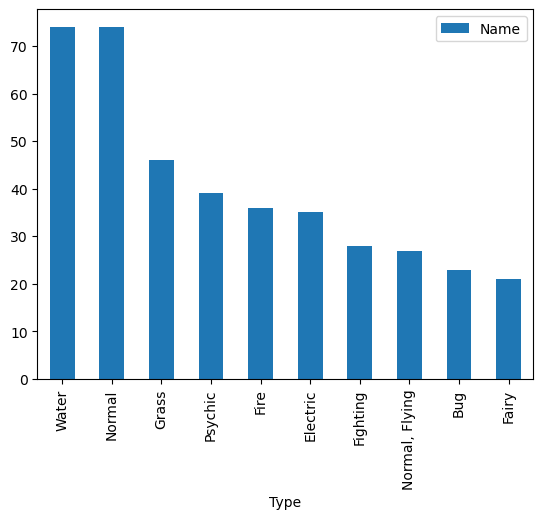

In [7]:
# Generar gráfico de barras con métodos internos de pandas

df_types_top10.plot(kind='bar')

plt.show()

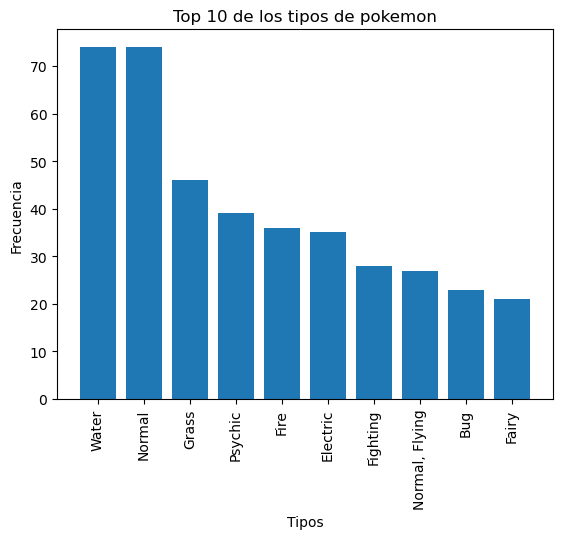

In [8]:
# Generar gráfico de barras directamente con matplotlib

plt.bar(x=df_types_top10.index, height=df_types_top10['Name'])
plt.title('Top 10 de los tipos de pokemon')
plt.xlabel('Tipos')
plt.ylabel('Frecuencia')
plt.xticks(rotation='vertical')
plt.show()

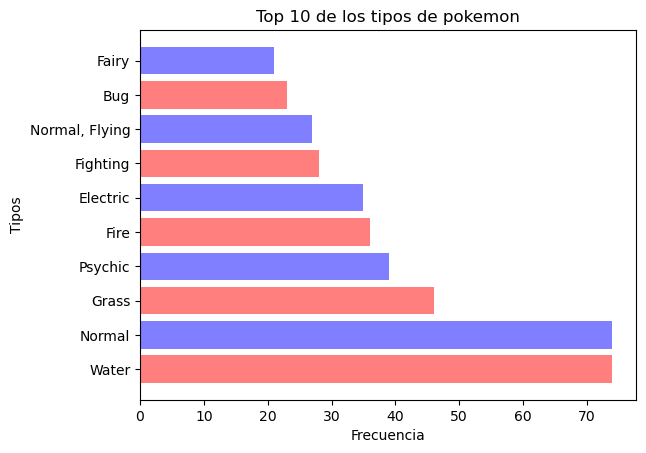

In [9]:
plt.barh(y=df_types_top10.index, width=df_types_top10['Name'], color=["red","blue"], alpha=0.5)
plt.title('Top 10 de los tipos de pokemon')
plt.xlabel('Frecuencia')
plt.ylabel('Tipos')
plt.show()

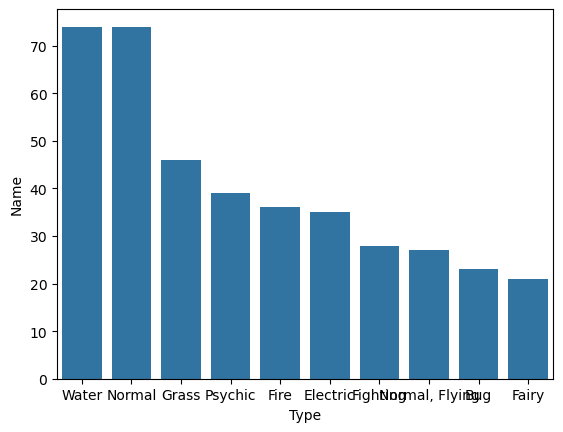

In [10]:
# Gráfico de barras con Seaborn
sns.barplot(data=df_types_top10, y='Name', x=df_types_top10.index)

plt.show()

Para tener la información de manera relativa, en términos de un porcentaje, necesitamos calcular la frecuencia relativa de cada categoría.

In [11]:
# Número total de observaciones
n_obs = df_types['Name'].sum()
print('Numero total de pokemon: ', n_obs)

Numero total de pokemon:  1010


Podemos crear una nueva columna en los datos con este valor.

In [12]:
df_types_top10['rel_freq'] = df_types_top10['Name'] / n_obs

# Agregamos una fila faltante de "Otros", para completar el porcentaje del top 10
df_types_top10_rel = df_types_top10.copy() ## Se hace una copia
df_types_top10_rel.loc['Other'] = [n_obs - df_types_top10['Name'].sum(), 1.0-df_types_top10_rel['rel_freq'].sum()]
df_types_top10_rel
# recordar que lo que se calcula es una proporción entre 0 y 1.

,Name,rel_freq
Type,,
Water,74.0,0.073267
Normal,74.0,0.073267
Grass,46.0,0.045545
Psychic,39.0,0.038614
Fire,36.0,0.035644
Electric,35.0,0.034653
Fighting,28.0,0.027723
"Normal, Flying",27.0,0.026733
Bug,23.0,0.022772


### Gráfico Circular (Gráfico de Pastel o Pie Chart)

El **gráfico circular** es una representación visual que muestra **cómo se divide un total** (generalmente el 100%) entre diferentes categorías. Cada categoría se representa como una **porción del círculo**, cuyo ángulo o área es proporcional a su frecuencia o porcentaje.


#### ¿Cuándo se usa un gráfico circular?

Este tipo de gráfico es útil cuando:

- Queremos visualizar **la proporción de cada categoría** respecto al total.
- Las categorías **son pocas** y **mutuamente excluyentes**.
- Se desea una representación visual intuitiva de **porcentajes**.

> **NOTA:** No se recomienda usarlo con muchas categorías ni cuando las diferencias son pequeñas, ya que puede dificultar la interpretación.


#### Elementos del gráfico circular

- **Porciones o sectores**: representan cada categoría.
- **Ángulo de cada sector**: proporcional a la frecuencia relativa.
- **Colores o etiquetas**: ayudan a identificar las categorías.
- **Leyenda o anotaciones**: muestran el nombre y porcentaje de cada categoría.

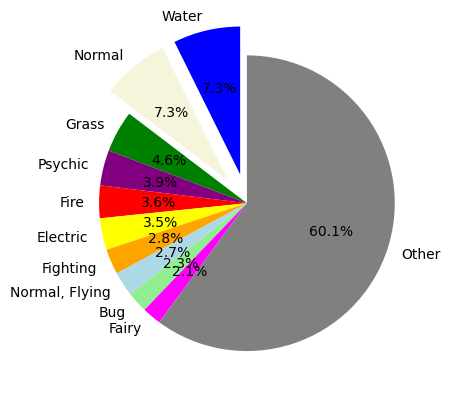

In [13]:
# Gráfico circular con matplotlib 

plt.pie(x=df_types_top10_rel['rel_freq'],
        labels=df_types_top10_rel.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['blue', 'beige', 'green', 'purple', 'red', 'yellow', 'orange', 'lightblue','lightgreen','magenta','gray'],
        explode=[0.2,0.2,0,0,0,0,0,0,0,0,0])

plt.show()

## Datos adicionales

In [14]:
#mainpath = "../data"
#filename = "cereal/cereal.csv"
#fullpath = os.path.join(mainpath,filename)
url = "https://raw.githubusercontent.com/IvTole/MachineLearning_InferenciaBayesiana_CUGDL/refs/heads/main/data/cereal/cereal.csv"

df_cereal = pd.read_csv(url)

df_cereal.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [15]:
# estadísticos básicos del dataframe
df_cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [16]:
# En este caso, nos interesa la columna que menciona el fabricante
df_cereal["mfr"]

0     N
1     Q
2     K
3     K
4     R
     ..
72    G
73    G
74    R
75    G
76    G
Name: mfr, Length: 77, dtype: object

In [17]:
df_mfr = df_cereal['mfr'].value_counts().to_frame() # se puede hacer un dataframe con este agrupamiento
df_mfr

,count
mfr,
K,23
G,22
P,9
Q,8
R,8
N,6
A,1


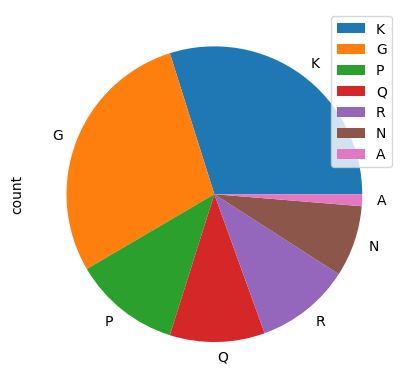

In [18]:
df_mfr.plot.pie(y = "count")
plt.show()

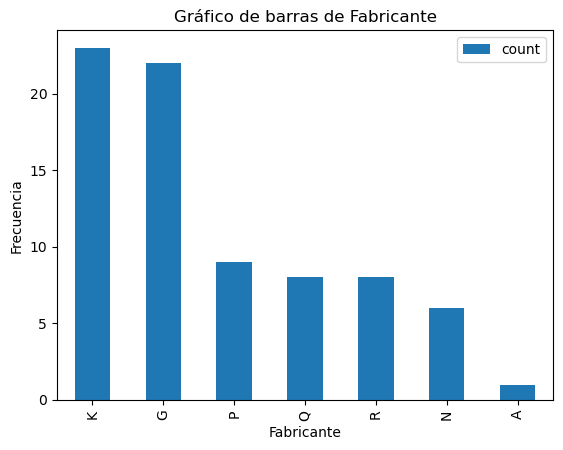

In [19]:
df_mfr.plot.bar(y='count')
plt.title('Gráfico de barras de Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Frecuencia')
plt.show()

#### Distribución de Frecuencias

Una **distribución de frecuencias** es una forma de organizar un conjunto de datos numéricos agrupándolos en clases o intervalos, junto con la **frecuencia** con que se presentan los valores en cada grupo.

Es uno de los pasos fundamentales del análisis exploratorio de datos, ya que permite **resumir, visualizar y analizar** cómo se distribuyen los datos.

Una distribución de frecuencias típicamente se presenta en forma de tabla o gráfico y contiene:

- **Intervalos de clase**: Rango de valores donde se agrupan los datos.
- **Frecuencia absoluta $f_i$**: Número de datos en cada intervalo.
- **Frecuencia relativa $h_i$**: Proporción respecto al total, \( h_i = \frac{f_i}{n} \).
- **Frecuencia acumulada $F_i$**: Suma progresiva de las frecuencias absolutas.
- **Frecuencia relativa acumulada $H_i$**: Suma progresiva de las frecuencias relativas.

### Histograma

El **histograma** es una representación gráfica que muestra cómo se distribuyen los datos **numéricos continuos o discretos** en intervalos o "clases". Es una de las herramientas más importantes en estadística descriptiva para analizar la **forma de una distribución**.

#### ¿Qué representa un histograma?

- En el eje **X** se colocan los **intervalos o clases** (rangos de valores).
- En el eje **Y** se coloca la **frecuencia absoluta o relativa** de los datos que caen en cada intervalo.
- Las **barras están pegadas**, lo que indica continuidad entre los intervalos.

> **NOTA:** A diferencia del **gráfico de barras**, que se usa para datos categóricos, el histograma se utiliza para **variables numéricas** y muestra **distribuciones**.

#### Elementos de un histograma

- **Intervalos (bins)**: dividen el rango de valores en segmentos iguales o personalizados.
- **Altura de cada barra**: representa cuántos datos (frecuencia) hay en cada intervalo.
- **Área total**: proporcional al número total de datos.

#### ¿Cuándo usar un histograma?

- Cuando se quiere observar la **forma de la distribución** de una variable (asimetría, concentración, colas).
- Para detectar **modas, valores extremos, simetría o sesgo**.
- En análisis exploratorio, como paso previo al modelado estadístico.

In [20]:
#filename = "churn/customer_churn_model.txt"
#fullpath = os.path.join(mainpath,filename)
url = "https://raw.githubusercontent.com/IvTole/MachineLearning_InferenciaBayesiana_CUGDL/refs/heads/main/data/churn/customer_churn_model.txt"
df_churn = pd.read_csv(url)
df_churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [21]:
df_churn.shape # dimensiones del dataframe
## Tengo 3333 observaciones en los datos con 21 columnas

(3333, 21)

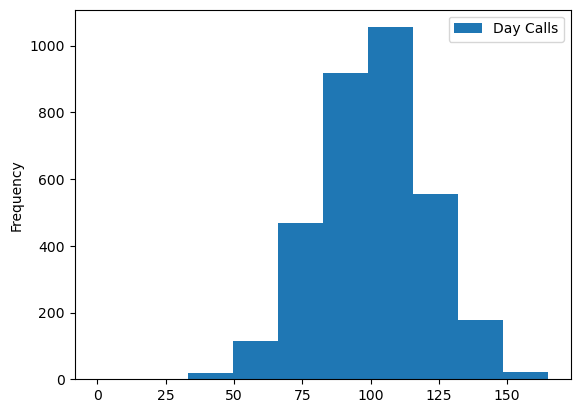

In [22]:
### Histograma con PANDAS
df_churn.plot.hist(y = "Day Calls", bins=10)
plt.show()

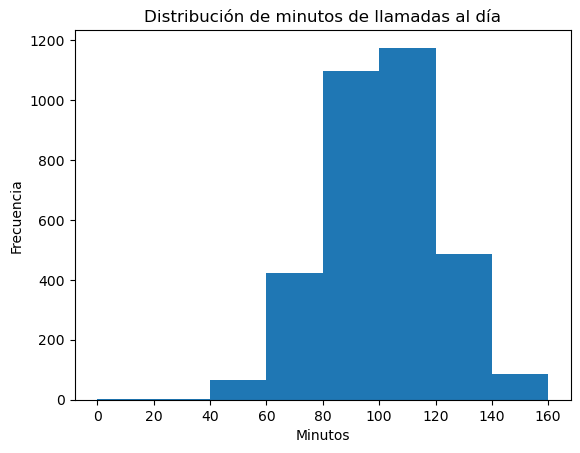

In [23]:
# Histograma con matplotlib

histo = plt.hist(df_churn['Day Calls'], bins=[0,20,40,60,80,100,120,140,160])

plt.title('Distribución de minutos de llamadas al día')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.show()

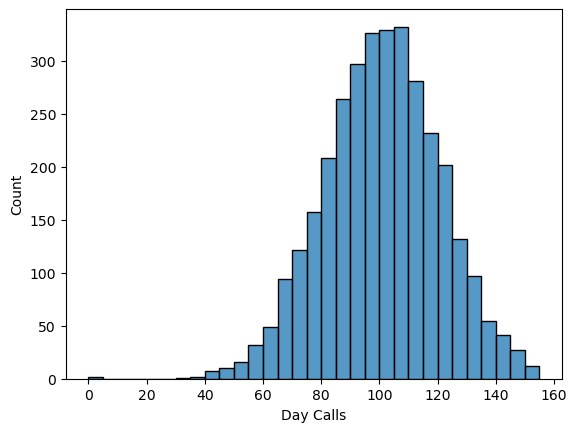

In [24]:
# Histograma con Seaborn
histo = sns.histplot(data=df_churn,
                     bins=np.arange(0,160,5),
                     x='Day Calls')

In [25]:
mean_day_calls = np.mean(df_churn['Day Calls'])
print('media del número de minutos de llamada al día: ', mean_day_calls)

media del número de minutos de llamada al día:  100.43564356435644


Aquí se muestra la distribución de minutos utilizados por cliente al día.

Se puede observar que la frecuencia más alta se encuentra entre 100 y 120 minutos al día.

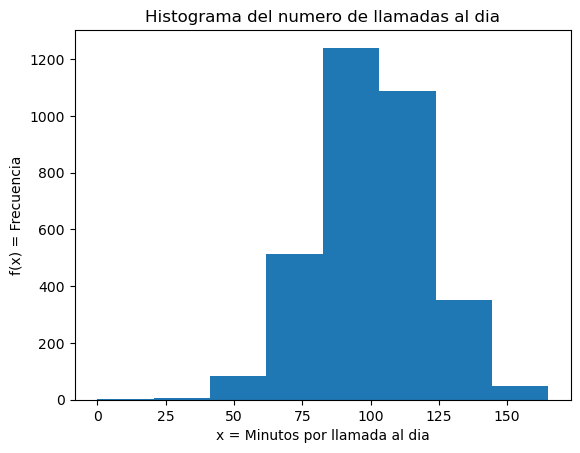

In [26]:
# Un poco más de personalización con matplotlib

## guardar datos de histograma en una variable (histo_plot)
histo_plot = plt.hist(df_churn["Day Calls"], bins = 8) # ocho divisiones
#histo_plot = plt.hist(data["Day Calls"], bins = [0,25,50,75,100,125,150,175]) # ocho divisiones
plt.xlabel("x = Minutos por llamada al dia")
plt.ylabel("f(x) = Frecuencia")
plt.title ("Histograma del numero de llamadas al dia")
plt.show()

#### Recomendaciones para construir una distribución de frecuencias agrupadas

1. **Decidir el número de clases**:  
   Elegir una cantidad adecuada de clases es esencial. Si se eligen **demasiadas clases**, los datos se verán fragmentados; si se eligen **muy pocas**, se puede ocultar la estructura real de la distribución.

   - Para distribuciones cercanas a la normal, se puede usar la **regla de Sturges**:

     \begin{equation}
     k = 1 + \log_2(n)
     \end{equation}

     donde $k$ es el número de clases y $n$ es el número total de observaciones.

   - Alternativamente, puede utilizarse el criterio de:

     \begin{equation}
     2^k > n
     \end{equation}

     Es decir, se elige el menor valor de $k$ tal que $2^k$ sea mayor que el número de datos.  
     Por ejemplo, si hay 180 observaciones, se puede usar $2^8 = 256 > 180$, por lo tanto, $k = 8$ clases.


2. **Determinar el ancho de clase (intervalo)**:  
   El ancho de cada clase se puede calcular inicialmente como:

   \begin{equation}
   i \geq \frac{H - L}{k}
   \end{equation}

   donde:
   - $i$ es el ancho del intervalo,
   - $H$ es el valor máximo (high),
   - $L$ es el valor mínimo (low),
   - $k$ es el número de clases.

   Luego se puede **redondear hacia arriba** a un valor conveniente. También se pueden ajustar los intervalos para que todos sean iguales, aunque en algunos casos se permiten **intervalos desiguales** si ciertos rangos tienen pocos o ningún dato.

3. **Establecer los límites de clase**:  
   Una vez definidos el número de clases y el ancho, se fijan los **límites inferior y superior de cada clase**. Es común extender ligeramente el rango total para **incluir todos los datos** y evitar valores fuera de clase.

4. **Contar las frecuencias por clase**:  
   Finalmente, se cuenta cuántos datos caen dentro de cada intervalo definido. Con esta información, se construye la **tabla de distribución de frecuencias** (absolutas, relativas, acumuladas, etc.).

Este proceso permite representar adecuadamente datos cuantitativos continuos, facilitando su análisis visual (por ejemplo, mediante histogramas) e inferencial.


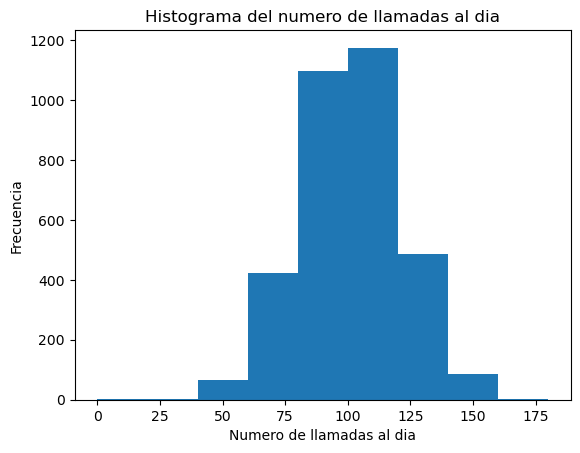

In [27]:
# tambien uno puede decir donde quiere las divisiones
plt.hist(df_churn["Day Calls"], bins = [0,20,40,60,80,100,120,140,160,180]) # diez divisiones
plt.xlabel("Numero de llamadas al dia")
plt.ylabel("Frecuencia")
plt.title ("Histograma del numero de llamadas al dia")
plt.show()

k:  13


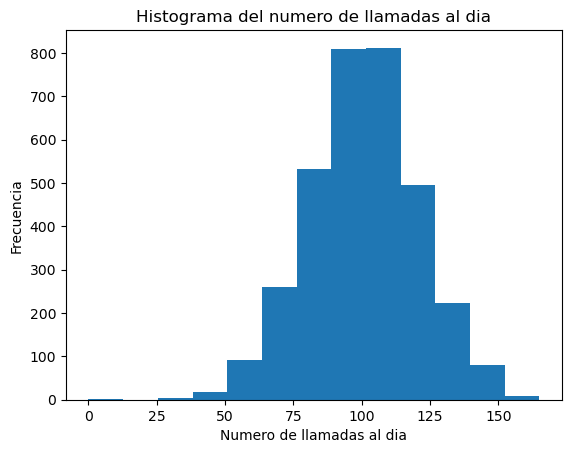

In [28]:
# aplicar regla de Sturges para sugerir el numero de divisiones
k = int(np.ceil(1 + np.log2(3333))) #sturges redondeado
print('k: ', k)
plt.hist(df_churn["Day Calls"], bins = k) # trece divisiones
plt.xlabel("Numero de llamadas al dia")
plt.ylabel("Frecuencia")
plt.title ("Histograma del numero de llamadas al dia")
plt.show()
#Esto es para que sea facil de leer el histograma

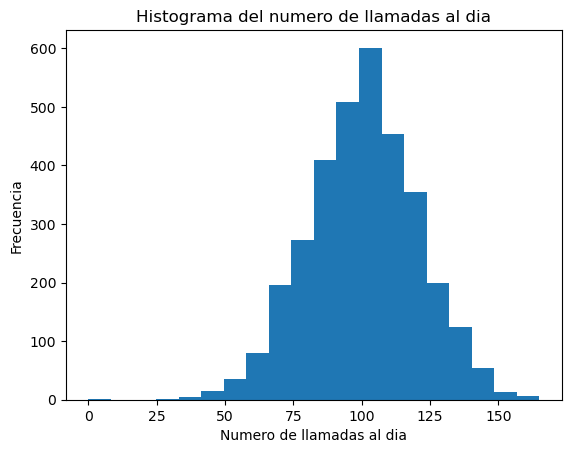

In [29]:
# O decidir uno mismo el numero de bines
histo_plot = plt.hist(df_churn["Day Calls"], bins = 20) # veinte divisiones
plt.xlabel("Numero de llamadas al dia")
plt.ylabel("Frecuencia")
plt.title ("Histograma del numero de llamadas al dia")
plt.show()

### Valores medios de las categorias del histograma

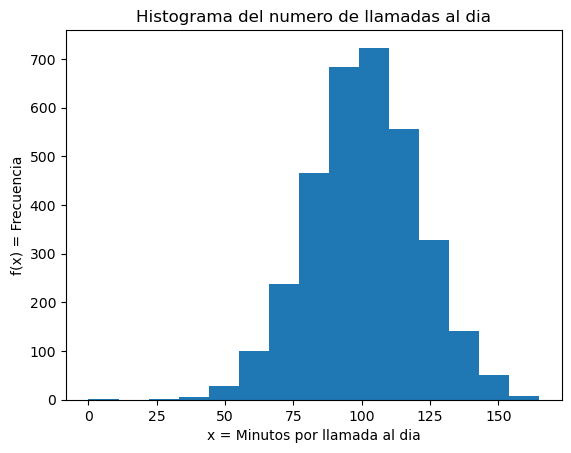

In [30]:
## Guardamos los datos de histograma en una variable (histo_plot)

histo_plot = plt.hist(df_churn["Day Calls"], bins = 15) # 15 divisiones
plt.xlabel("x = Minutos por llamada al dia")
plt.ylabel("f(x) = Frecuencia")
plt.title ("Histograma del numero de llamadas al dia")
plt.show()

In [31]:
## información del histograma
# Esta variable guarda dos arrays, con informacion de los bines y de la frecuencia
## Recordar que en python los arreglos empiezan con el índice 0

histo_plot

(array([  2.,   0.,   1.,   6.,  29., 100., 237., 466., 683., 723., 557.,
        329., 141.,  51.,   8.]),
 array([  0.,  11.,  22.,  33.,  44.,  55.,  66.,  77.,  88.,  99., 110.,
        121., 132., 143., 154., 165.]),
 <BarContainer object of 15 artists>)

In [32]:
# con la informacion del histograma, creamos una nueva lista con los intervalos (como string)

category = []
for i in range(1,len(histo_plot[1])):
    category.append(str(histo_plot[1][i]) + "-" + str(histo_plot[1][i-1]))
print('numero de categorias = ', len(category))
category

numero de categorias =  15


['11.0-0.0',
 '22.0-11.0',
 '33.0-22.0',
 '44.0-33.0',
 '55.0-44.0',
 '66.0-55.0',
 '77.0-66.0',
 '88.0-77.0',
 '99.0-88.0',
 '110.0-99.0',
 '121.0-110.0',
 '132.0-121.0',
 '143.0-132.0',
 '154.0-143.0',
 '165.0-154.0']

In [33]:
# Hacemos un dataframe con estos intervalos y su frecuencia

freq_dist = pd.DataFrame(
    {
        "Categorias": category,
        "Frecuencia": histo_plot[0]
    }
)
freq_dist

,Categorias,Frecuencia
0,11.0-0.0,2.0
1,22.0-11.0,0.0
2,33.0-22.0,1.0
3,44.0-33.0,6.0
4,55.0-44.0,29.0
5,66.0-55.0,100.0
6,77.0-66.0,237.0
7,88.0-77.0,466.0
8,99.0-88.0,683.0
9,110.0-99.0,723.0


La **frecuencia acumulada** es la suma progresiva de las frecuencias absolutas hasta una determinada clase o valor. Nos indica **cuántos datos se han registrado hasta cierto punto** de la distribución. Es especialmente útil para conocer la posición relativa de los datos y para construir gráficas como el polígono de frecuencias acumuladas o la ojiva.

In [34]:
# Creamos una columna de frecuencia cumulativa

freq_dist["Cumulative frequency"] = freq_dist["Frecuencia"].cumsum()
freq_dist

,Categorias,Frecuencia,Cumulative frequency
0,11.0-0.0,2.0,2.0
1,22.0-11.0,0.0,2.0
2,33.0-22.0,1.0,3.0
3,44.0-33.0,6.0,9.0
4,55.0-44.0,29.0,38.0
5,66.0-55.0,100.0,138.0
6,77.0-66.0,237.0,375.0
7,88.0-77.0,466.0,841.0
8,99.0-88.0,683.0,1524.0
9,110.0-99.0,723.0,2247.0


In [35]:
### Caracterizamos a los intervalos por su valor medio
category_mid = []
for i in range(1,len(histo_plot[1])):
    category_mid.append((histo_plot[1][i] + histo_plot[1][i-1]) /2.)
category_mid

[5.5,
 16.5,
 27.5,
 38.5,
 49.5,
 60.5,
 71.5,
 82.5,
 93.5,
 104.5,
 115.5,
 126.5,
 137.5,
 148.5,
 159.5]

In [36]:
## Agregamos el valor medio de la categoria al dataframe
freq_dist["Mid Category"] = category_mid
freq_dist

,Categorias,Frecuencia,Cumulative frequency,Mid Category
0,11.0-0.0,2.0,2.0,5.5
1,22.0-11.0,0.0,2.0,16.5
2,33.0-22.0,1.0,3.0,27.5
3,44.0-33.0,6.0,9.0,38.5
4,55.0-44.0,29.0,38.0,49.5
5,66.0-55.0,100.0,138.0,60.5
6,77.0-66.0,237.0,375.0,71.5
7,88.0-77.0,466.0,841.0,82.5
8,99.0-88.0,683.0,1524.0,93.5
9,110.0-99.0,723.0,2247.0,104.5


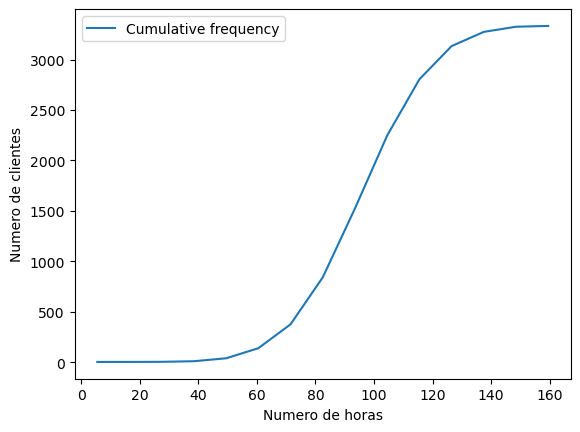

In [37]:
freq_dist.plot("Mid Category","Cumulative frequency")
plt.xlabel('Numero de horas')
plt.ylabel('Numero de clientes')
plt.show()
# numero de horas en tantos clientes, que porcentaje de personas hicieron menos de tantas llamadas

In [38]:
# calculamos el total de horas para obtener la frecuencia relativa
Total_freq = np.sum(freq_dist["Frecuencia"])
Total_freq

3333.0

In [39]:
# Creamos una lista con esta frecuencia relativa

freq_dist_list = freq_dist["Cumulative frequency"].values.tolist()
freq_rel_list = []
for x in freq_dist_list:
    freq_rel_list.append(x/Total_freq)
freq_rel_list

[0.0006000600060006001,
 0.0006000600060006001,
 0.0009000900090009,
 0.0027002700270027003,
 0.011401140114011402,
 0.041404140414041404,
 0.11251125112511251,
 0.25232523252325234,
 0.45724572457245727,
 0.6741674167416741,
 0.8412841284128413,
 0.93999399939994,
 0.9822982298229823,
 0.9975997599759976,
 1.0]

In [40]:
# agregamos esta informacion al data frame
freq_dist["Cumulative Rel Frequency"] = freq_rel_list
freq_dist

,Categorias,Frecuencia,Cumulative frequency,Mid Category,Cumulative Rel Frequency
0,11.0-0.0,2.0,2.0,5.5,0.000600
1,22.0-11.0,0.0,2.0,16.5,0.000600
2,33.0-22.0,1.0,3.0,27.5,0.000900
3,44.0-33.0,6.0,9.0,38.5,0.002700
4,55.0-44.0,29.0,38.0,49.5,0.011401
5,66.0-55.0,100.0,138.0,60.5,0.041404
6,77.0-66.0,237.0,375.0,71.5,0.112511
7,88.0-77.0,466.0,841.0,82.5,0.252325
8,99.0-88.0,683.0,1524.0,93.5,0.457246
9,110.0-99.0,723.0,2247.0,104.5,0.674167


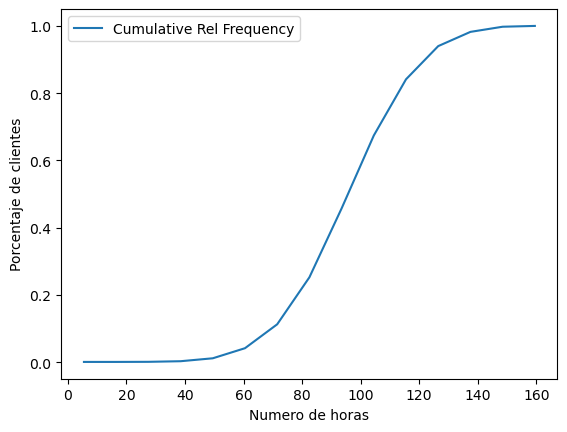

In [41]:
freq_dist.plot("Mid Category","Cumulative Rel Frequency")
plt.xlabel('Numero de horas')
plt.ylabel('Porcentaje de clientes')
plt.show()

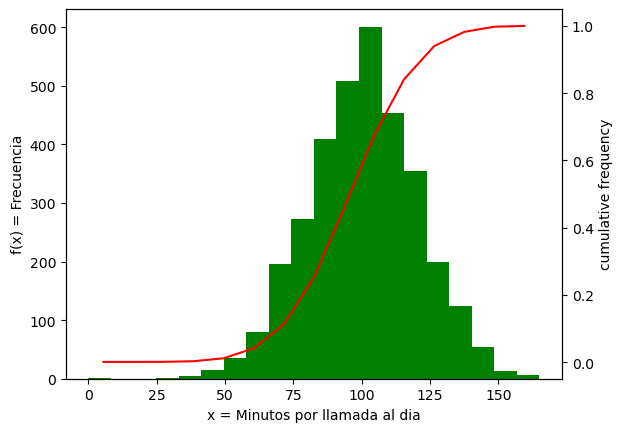

In [42]:
# Comparamos con el histograma original
# Histograma cumulativo

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#ax2.plot(x, y2, 'b-')
ax1.hist(df_churn["Day Calls"], bins = 20, color='g') # ocho divisiones
ax1.set_xlabel('x = Minutos por llamada al dia')
ax1.set_ylabel('f(x) = Frecuencia')

#ax1.plot(x, y1, 'g-')
ax2.plot(freq_dist["Mid Category"], freq_dist["Cumulative Rel Frequency"],'r-')
ax2.set_ylabel('cumulative frequency')

plt.show()


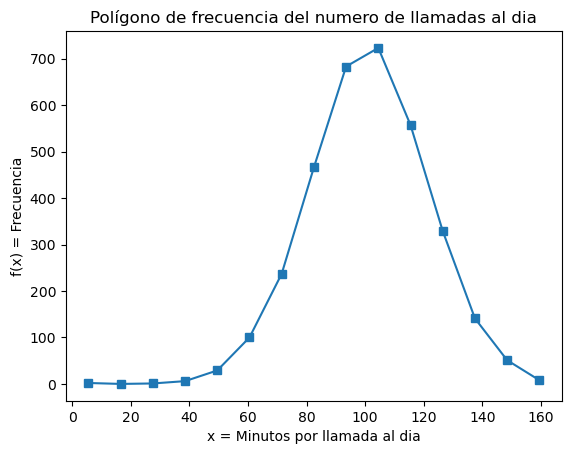

In [43]:
# para comparar diferentes histogramas
## polígono de frecuencia
plt.plot(freq_dist["Mid Category"],freq_dist["Frecuencia"],'-s')
plt.title ("Polígono de frecuencia del numero de llamadas al dia")
plt.xlabel("x = Minutos por llamada al dia")
plt.ylabel("f(x) = Frecuencia")
plt.show()

### Tablas de Contingencia

Una **tabla de contingencia** es una herramienta estadística que permite **resumir la relación entre dos variables categóricas**. Organiza los datos en forma de una **matriz de frecuencias**, donde las filas representan los valores de una variable y las columnas los de otra.

### ¿Para qué sirven?

- Analizar **asociaciones o dependencias** entre dos variables cualitativas.
- Visualizar la **distribución conjunta** de dos atributos.
- Calcular **frecuencias relativas, porcentajes fila, columna y totales**.
- Servir como base para pruebas estadísticas como el **chi-cuadrado de independencia**.


In [44]:
contingency_data = pd.DataFrame(
    {
        "L": [35,50,85],
        "M": [36,44,80],
        "C":[6,21,27],
        "Total": [77,115,192],
    },
        index = ["Mujer","Hombre","Total"]
    
)
contingency_data

,L,M,C,Total
Mujer,35,36,6,77
Hombre,50,44,21,115
Total,85,80,27,192


In [45]:
#filename = "purchase/gender_purchase.csv"
#fullpath = os.path.join(mainpath,filename)
url = "https://raw.githubusercontent.com/IvTole/MachineLearning_InferenciaBayesiana_CUGDL/refs/heads/main/data/purchase/gender_purchase.csv"

df_purchase = pd.read_csv(url)
df_purchase.head(10)

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes
5,Female,Yes
6,Male,No
7,Female,Yes
8,Female,No
9,Female,Yes


In [46]:
contingency_table = pd.crosstab(df_purchase["Gender"],df_purchase["Purchase"])
contingency_table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


### Diagrama de tallo y hoja

El **diagrama de tallo y hoja** organiza los valores individuales del conjunto de datos en un orden ascendente (de abajo hacia arriba) en una columna (o tallo), en intervalos (no siempre de diez en diez). En el tallo se muestra el principio del valor numérico (por ejemplo centenas y decenas, se tiene que definir por un índice) y en las hojas lo restante (normalmente un dígito, si es posible). El diagrama muestra la forma de la distribución en las hojas. Útil cuando no se tiene un conjunto tan grande de datos para observar la forma de la distribución además de los valores individuales.

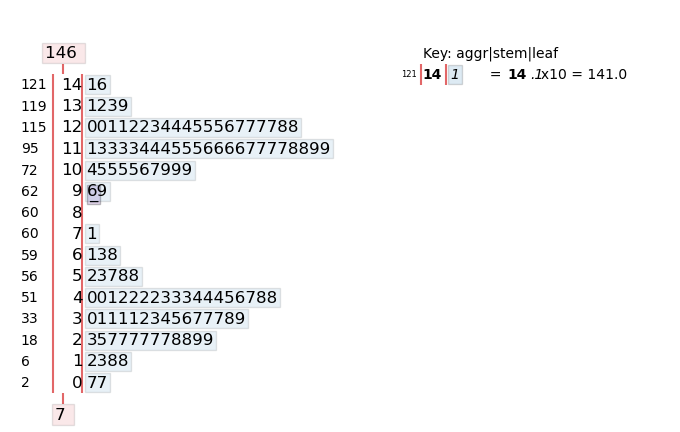

In [47]:
import stemgraphic

x = [
    12, 127, 28, 42, 39, 113, 42, 18, 44, 118, 44, 37, 113, 124, 37, 48, 127, 36, 29, 31,
    125, 139, 131, 115, 105, 132, 104, 123, 35, 113, 122, 42, 117, 119, 58, 109, 23, 105,
    63, 27, 44, 105, 99, 41, 128, 121, 116, 125, 32, 61, 37, 127, 29, 113, 121, 58, 114,
    126, 53, 114, 96, 25, 109, 7, 31, 141, 46, 13, 27, 43, 117, 116, 27, 7, 68, 40, 31, 115,
    124, 42, 128, 52, 71, 118, 117, 38, 27, 106, 33, 117, 116, 111, 40, 119, 47, 105, 57,
    122, 109, 124, 115, 43, 120, 43, 27, 27, 18, 28, 48, 125, 107, 114, 34, 133, 45, 120,
    30, 127, 31, 116, 146
]
y = pd.Series(x)

fig, ax = stemgraphic.stem_graphic(y)

### Diagrama de Caja y Bigotes (Boxplot)

El **diagrama de caja y bigotes** es una representación gráfica que resume la **distribución de un conjunto de datos numéricos**. Permite identificar de manera visual:

- La **dispersión** de los datos.
- La **asimetría**.
- La **presencia de valores atípicos** (outliers).
- La **posición de la mediana**.



#### Componentes del boxplot

Un boxplot se basa en los **cuartiles** de la distribución:

- **Caja (box)**: se extiende desde el primer cuartil $Q_1$ (percentil 25) hasta el tercer cuartil $Q_3$ (percentil 75).
- **Línea central dentro de la caja**: representa la **mediana** $Q_2$ (percentil 50).
- **Bigotes (whiskers)**: líneas que se extienden desde la caja hasta los valores máximos y mínimos que **no se consideran atípicos**.
- **Puntos fuera de los bigotes**: representan **valores atípicos**.


#### ¿Cómo se calculan los valores atípicos?

Por convención (Tukey), los bigotes se extienden hasta:

$$
\text{Límite inferior} = Q_1 - 1.5 \times IQR
$$
$$
\text{Límite superior} = Q_3 + 1.5 \times IQR
$$

donde:

$$
IQR = Q_3 - Q_1
$$

Los puntos fuera de estos límites se consideran **outliers**.

In [48]:
#filename = "churn/customer_churn_model.txt"
#fullpath = os.path.join(mainpath,filename)

url = "https://raw.githubusercontent.com/IvTole/MachineLearning_InferenciaBayesiana_CUGDL/refs/heads/main/data/churn/customer_churn_model.txt"

df_churn = pd.read_csv(url)

In [49]:
df_churn["Day Calls"]

0       110
1       123
2       114
3        71
4       113
       ... 
3328     77
3329     57
3330    109
3331    105
3332    113
Name: Day Calls, Length: 3333, dtype: int64

Text(0.5, 1.0, 'Boxplots de las llamadas diarias')

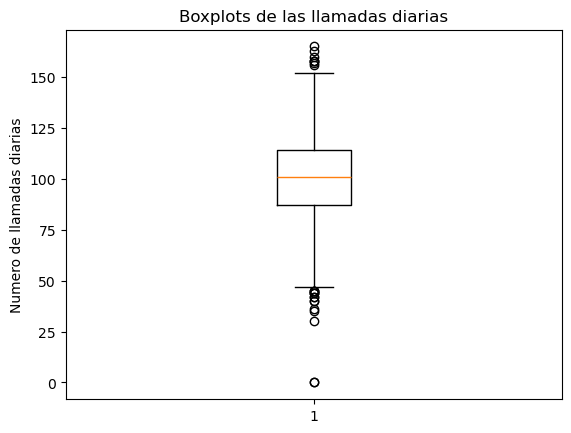

In [50]:
plt.boxplot(df_churn["Day Calls"])
plt.ylabel("Numero de llamadas diarias") #solo esto pues solo tenemos una variable
plt.title("Boxplots de las llamadas diarias")

In [51]:
df_churn["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [52]:
IQR = df_churn["Day Calls"].quantile(0.75) - df_churn["Day Calls"].quantile(0.25)
IQR

27.0

In [53]:
#rango intercuartil
print(df_churn["Day Calls"].quantile(0.25) - 1.5*IQR) #menor
print(df_churn["Day Calls"].quantile(0.75) + 1.5*IQR) #mayor

46.5
154.5


### Diagrama de dispersión (Scatter plot)

El **diagrama de dispersión** es una representación gráfica que muestra la **relación entre dos variables numéricas**. Cada punto en el plano representa un par de valores \((x_i, y_i)\), es decir, una observación conjunta de dos variables.


#### ¿Para qué sirve?

- Explorar visualmente si existe una **relación** entre dos variables.
- Identificar **tendencias lineales o no lineales**.
- Detectar **valores atípicos** (outliers).
- Evaluar la **fuerza y dirección** de una relación (positiva, negativa o nula).
- Como paso previo al **análisis de correlación o regresión**.



#### Elementos del gráfico

- **Eje X**: representa la primera variable (predictora o independiente).
- **Eje Y**: representa la segunda variable (dependiente).
- **Puntos**: cada punto representa una observación $(x, y)$.

El siguiente conjunto de datos contiene información sobre una campaña publicitaria, y es ampliamente utilizado en cursos de estadística, ciencia de datos y aprendizaje automático para ilustrar modelos de **regresión lineal múltiple**.

El objetivo principal del análisis es estudiar cómo la inversión en diferentes medios de publicidad influye en las **ventas de un producto**. La idea es identificar qué medio publicitario tiene mayor impacto y cómo se relacionan los gastos con los resultados de ventas.

La descripción de las variables es el siguiente:

| Columna     | Descripción                                                 |
|-------------|--------------------------------------------------------------|
| `TV`        | Inversión en publicidad en televisión (miles de dólares)     |
| `Radio`     | Inversión en publicidad en radio (miles de dólares)          |
| `Newspaper` | Inversión en publicidad en periódicos (miles de dólares)     |
| `Sales`     | Ventas del producto (miles de unidades)                      |

Algunos de los objetivos de un análisis utilizando estos datos pueden ser los siguientes:

- Analizar la **correlación** entre la inversión publicitaria y las ventas.
- Ajustar un modelo de **regresión lineal múltiple**, usando `Sales` como variable dependiente.
- Comparar la **efectividad relativa** de TV, radio y prensa escrita.
- Visualizar gráficamente la relación entre cada medio y las ventas.

In [54]:
#filename = "advertising/advertising.csv"
#fullpath = os.path.join(mainpath,filename)

url = "https://raw.githubusercontent.com/IvTole/MachineLearning_InferenciaBayesiana_CUGDL/refs/heads/main/data/advertising/advertising.csv"

df_advertising = pd.read_csv(url)
df_advertising.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


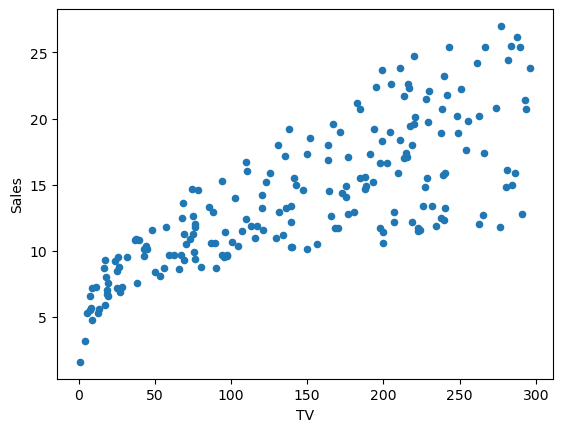

In [55]:
# Gráfico con pandas
df_advertising.plot(kind="scatter", x = "TV", y = "Sales")
plt.show()

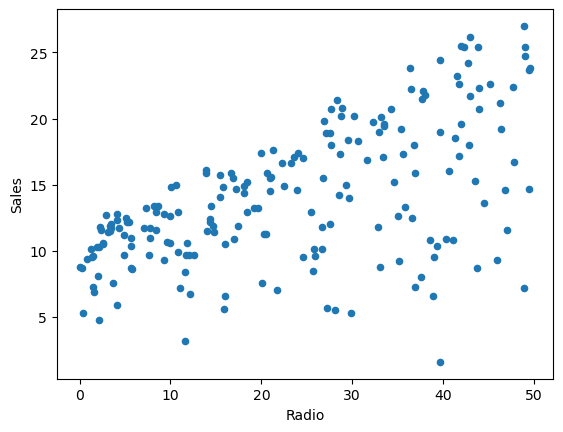

In [56]:
# Ocurre lo mismo para campaña de radio?
df_advertising.plot(kind="scatter", x = "Radio", y = "Sales")
plt.show()

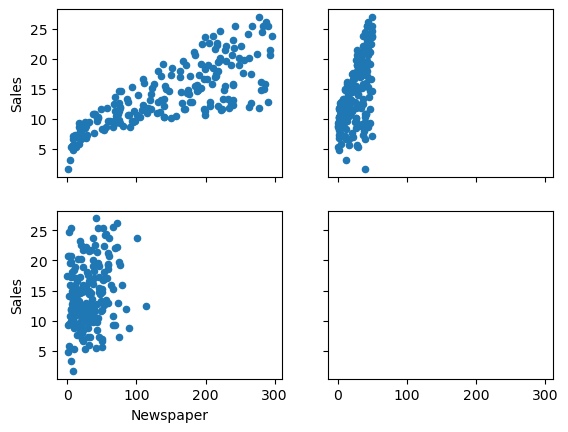

In [57]:
# podriamos hacer el caso para ir de dos en dos variables
# se pueden hacer multiples representaciones graficas
# lamamos a la funcion subplot

figure, axs = plt.subplots(2,2,sharey = True, sharex = True) #matriz de dos por dos
df_advertising.plot(kind = "scatter", x = "TV", y = "Sales", ax = axs[0][0]) # se especifica el primero de los cuatro graficos
df_advertising.plot(kind = "scatter", x = "Radio", y = "Sales", ax = axs[0][1]) # se especifica el primero de los cuatro graficos
df_advertising.plot(kind = "scatter", x = "Newspaper", y = "Sales", ax = axs[1][0]) # se especifica el primero de los cuatro graficos

plt.show()

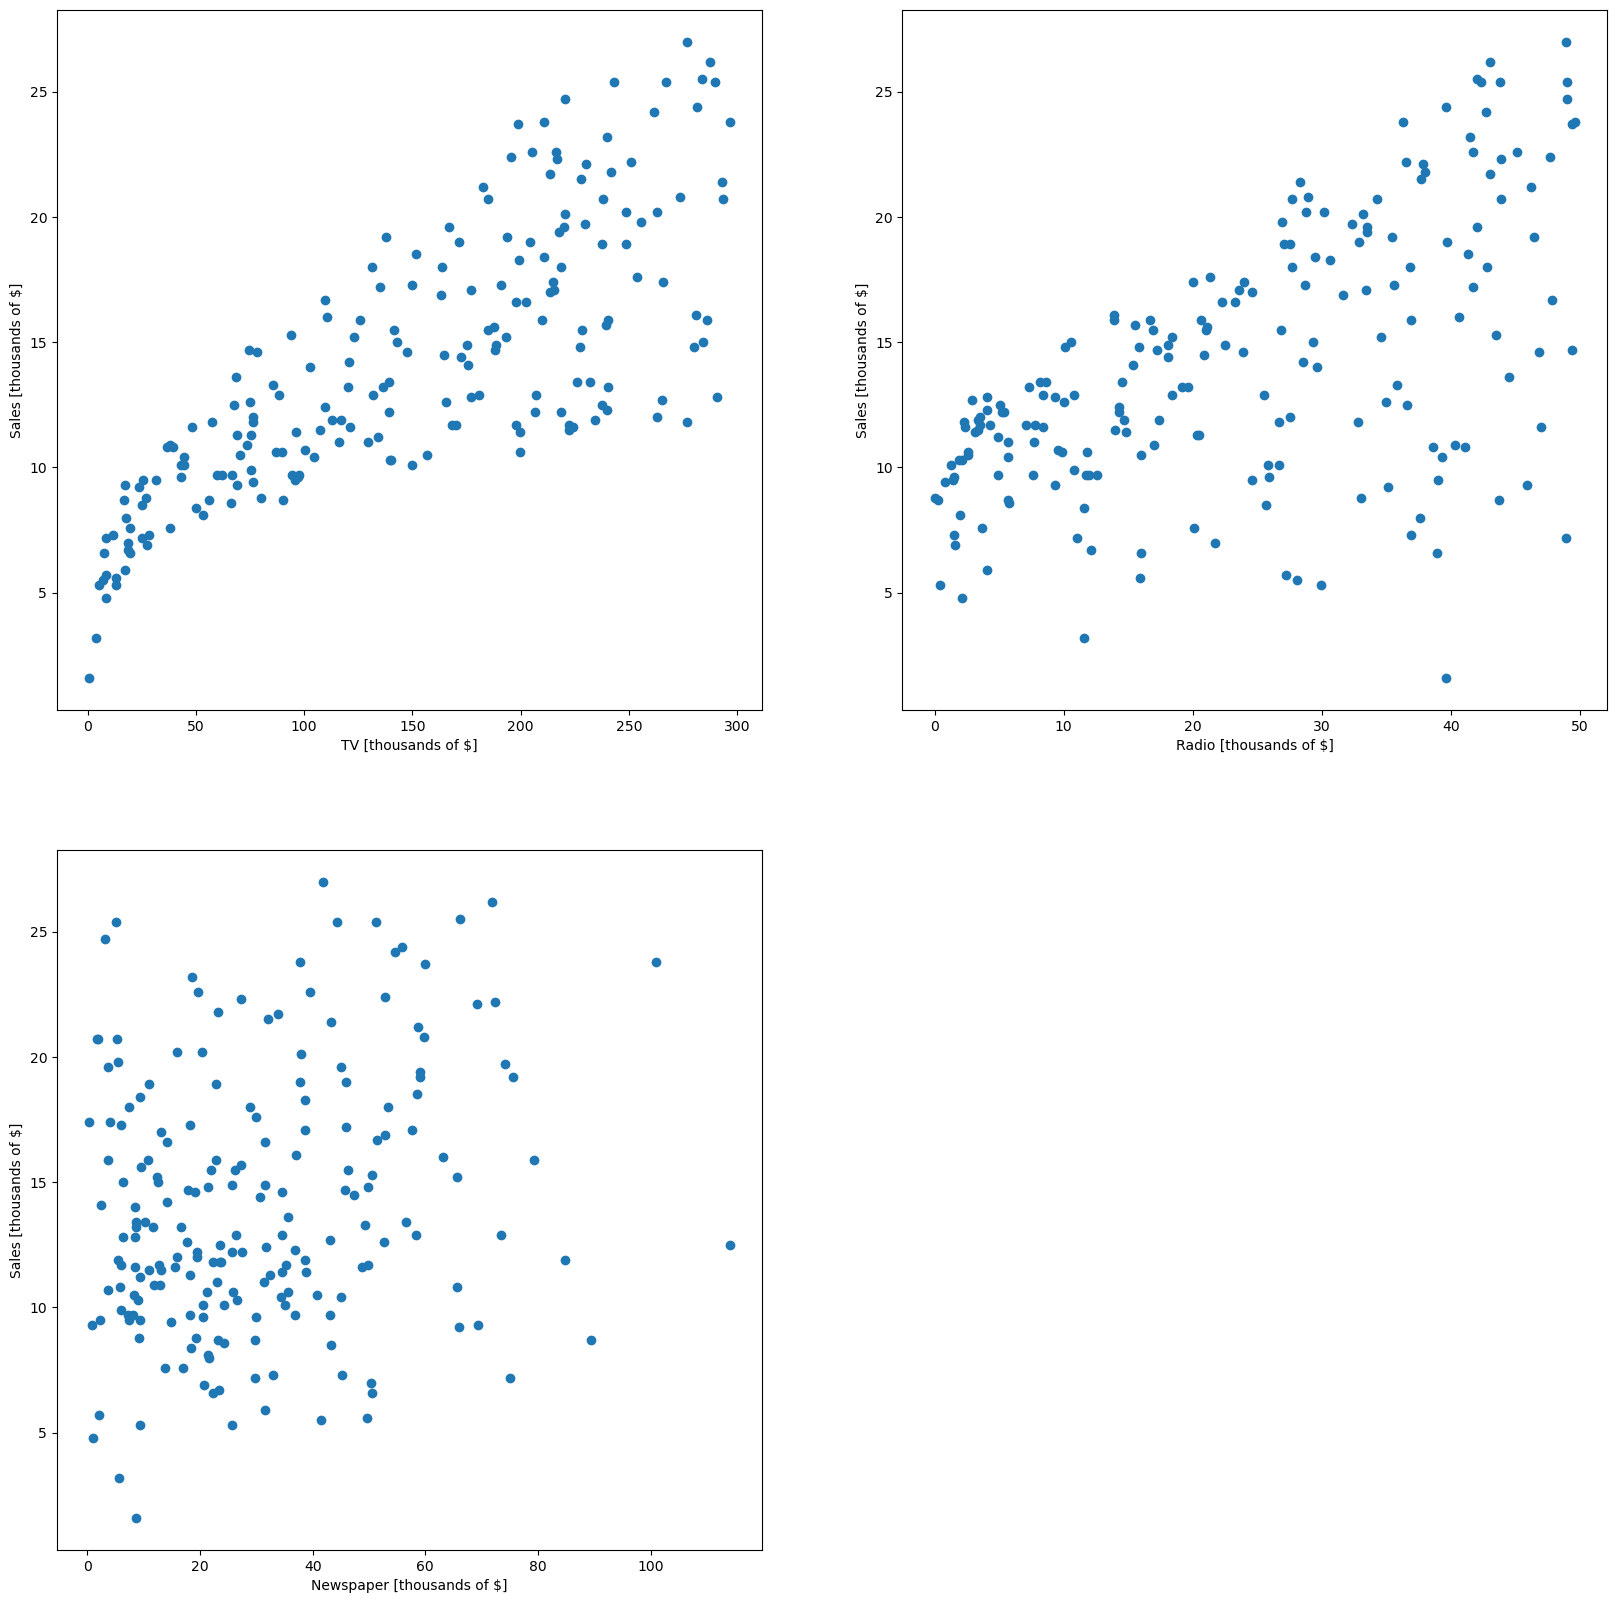

In [58]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(221)
ax1.scatter(x=df_advertising['TV'],
            y=df_advertising['Sales'])
ax1.set_xlabel('TV [thousands of $]')
ax1.set_ylabel('Sales [thousands of $]')

ax2 = fig.add_subplot(222)
ax2.scatter(x=df_advertising['Radio'],
            y=df_advertising['Sales'])
ax2.set_xlabel('Radio [thousands of $]')
ax2.set_ylabel('Sales [thousands of $]')

ax3 = fig.add_subplot(223)
ax3.scatter(x=df_advertising['Newspaper'],
            y=df_advertising['Sales'])
ax3.set_xlabel('Newspaper [thousands of $]')
ax3.set_ylabel('Sales [thousands of $]')

plt.show()

## Resumen

En este notebook hemos explorado las representaciones gráficas fundamentales para el análisis de datos en estadística descriptiva, utilizando Python con las librerías pandas, matplotlib y seaborn. Los temas cubiertos incluyen:

### Conceptos Fundamentales
- **Importación de datos** con pandas desde múltiples formatos (CSV, Excel, JSON, etc.)
- **Tablas de frecuencias** como base para la visualización de datos categóricos y numéricos
- **Distribuciones de frecuencias** para organizar datos numéricos en intervalos

### Visualizaciones para Variables Categóricas
- **Gráficos de barras**: ideales para comparar frecuencias entre categorías
- **Gráficos circulares (pie charts)**: útiles para mostrar proporciones del total
- **Tablas de contingencia**: para analizar relaciones entre dos variables categóricas

### Visualizaciones para Variables Numéricas
- **Histogramas**: para observar la forma y distribución de variables continuas
- **Polígonos de frecuencia**: para comparar distribuciones
- **Diagramas de tallo y hoja**: para conjuntos pequeños de datos
- **Diagramas de caja y bigotes (boxplots)**: para identificar valores atípicos y resumir la distribución
- **Diagramas de dispersión**: para explorar relaciones entre dos variables numéricas

### Datasets Utilizados
- **Pokemon**: para ejemplificar análisis de variables categóricas
- **Customer Churn**: para demostrar análisis de variables numéricas
- **Advertising**: para ilustrar relaciones bivariadas

## Conclusiones

Las representaciones gráficas son herramientas esenciales en el análisis exploratorio de datos, ya que permiten:

1. Identificar patrones y tendencias que no son evidentes en los datos tabulares
2. Detectar valores atípicos y anomalías en los datos
3. Comunicar resultados de manera efectiva y comprensible
4. Tomar decisiones informadas sobre el preprocesamiento y modelado de datos

### Recomendaciones Prácticas

- **Seleccionar el gráfico apropiado** según el tipo de variable (categórica vs. numérica)
- **Personalizar las visualizaciones** con títulos, etiquetas y colores para mejorar la 
interpretación
- **Combinar múltiples gráficos** para obtener una visión integral de los datos
- **Validar insights** obtenidos visualmente con análisis estadísticos complementarios

El dominio de estas técnicas de visualización constituye la base fundamental para cualquier análisis de datos exitoso en machine learning e inferencia bayesiana, proporcionando el entendimiento necesario antes de aplicar modelos más complejos.